# Imports

## Libraries

In [3]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import warnings
warnings.filterwarnings('ignore')
from shapely.geometry import Point

## Data

In [4]:
provinces_gdf = gpd.read_file("../data/provinces_gdf.geojson", driver='geojson')

# Centroids

## Calculate centroid for each region in italy 

There are *two* centroids I'll be plotting: one is a **geographic centroid** which is the true center of a regional unit. The other is a **"weighted mean population centroid,"** which shows the center of the *population* in a regional unit. 

- Steps to getting the population weighted mean centroid
    - find geographic centroid for each province 
    - group the provinces into a larger unit (macroregion, cultural region, all of italy)
    - assign a weight (i.e.: the population) to each province
    - find the numerator: multiply each latitude and longitude by the weight 
    - find the denominator: multiply a weight by the number of units in the smaller geometry
    - sum up all of the numerators and denominators for a given regional unit
    - divide the numerator by the denominator
    - plot results next to the geographic centroid

## Regions

### Getting Region Geometries

In [39]:
region_gemoetries = provinces_gdf.dissolve(by='Region')

### Finding Geographic centroid

In [34]:
region_geo_centroids = provinces_gdf.dissolve(by='Region')
region_geo_centroids['geometry'] = region_geo_centroids['geometry'].centroid

### Getting Weighted population centroids

In [7]:
# finding sum of population for each region
region_pop_sum = provinces_gdf.groupby('Region').Population.sum()

In [18]:
# finding weighted lat and lon for each region
provinces_gdf['Weighted_region_centroid_lat'] = [provinces_gdf['Pop_weighted_lat'][x] / \
                                                 region_pop_sum[provinces_gdf['Region'][x]] 
                                                for x in range(len(provinces_gdf))]
provinces_gdf['Weighted_region_centroid_lon'] = [provinces_gdf['Pop_weighted_lon'][x] / \
                                                 region_pop_sum[provinces_gdf['Region'][x]] 
                                                for x in range(len(provinces_gdf))]

In [27]:
# sum up all of the weighted coords and recombine
region_coord_sum = provinces_gdf.groupby('Region') \
                    ['Weighted_region_centroid_lat','Weighted_region_centroid_lon'].sum()

region_coord_sum['Weighted_centroid_coords'] = list(zip(region_coord_sum['Weighted_region_centroid_lat'], 
                                                   region_coord_sum['Weighted_region_centroid_lon']))
region_coord_sum['geometry'] = [Point(x) for x in region_coord_sum['Weighted_centroid_coords']]

In [31]:
# making it into a geodataframe
region_pop_weighted_gdf = gpd.GeoDataFrame(region_coord_sum)

### Plot 

<AxesSubplot:>

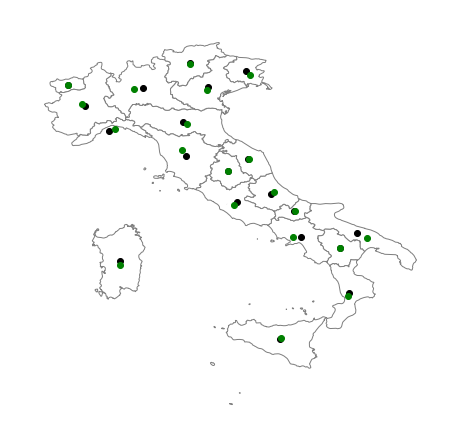

In [40]:
# green is population center while black is geo center
ax12 = region_geo_centroids.plot(color='black', figsize=(8,8))
region_pop_weighted_gdf.plot(figsize=(8,8), ax=ax12, color='green')
gplt.polyplot(region_gemoetries, facecolor='white', edgecolor='grey', ax=ax12, figsize=(8,8))

## Macroregions

### Getting Macroregion Geometries

In [41]:
macroregion_gemoetries = provinces_gdf.dissolve(by='Macroregion')

### Finding Geographic Centroids

In [42]:
macroregion_geo_centroids = provinces_gdf.dissolve(by='Macroregion')
macroregion_geo_centroids['geometry'] = macroregion_geo_centroids['geometry'].centroid

### Getting Weighted Population Centroids

In [50]:
# finding sum of population for each region
macroregion_pop_sum = provinces_gdf.groupby('Macroregion').Population.sum()

In [45]:
# finding weighted lat and lon for each region
provinces_gdf['Weighted_macroregion_centroid_lat'] = [provinces_gdf['Pop_weighted_lat'][x] / \
                                                 macroregion_pop_sum[provinces_gdf['Macroregion'][x]] 
                                                for x in range(len(provinces_gdf))]
provinces_gdf['Weighted_macroregion_centroid_lon'] = [provinces_gdf['Pop_weighted_lon'][x] / \
                                                 macroregion_pop_sum[provinces_gdf['Macroregion'][x]] 
                                                for x in range(len(provinces_gdf))]

In [57]:
# sum up all of the weighted coords and recombine
macroregion_coord_sum = provinces_gdf.groupby('Macroregion') \
                    ['Weighted_macroregion_centroid_lat','Weighted_macroregion_centroid_lon'].sum()
macroregion_coord_sum['Weighted_centroid_coords'] = list(zip(
                                                    macroregion_coord_sum['Weighted_macroregion_centroid_lat'], 
                                                   macroregion_coord_sum['Weighted_macroregion_centroid_lon']))
macroregion_coord_sum['geometry'] = [Point(x) for x in macroregion_coord_sum['Weighted_centroid_coords']]

In [58]:
# making it into a geodataframe
macroregion_pop_weighted_gdf = gpd.GeoDataFrame(macroregion_coord_sum)

### Plot

<AxesSubplot:>

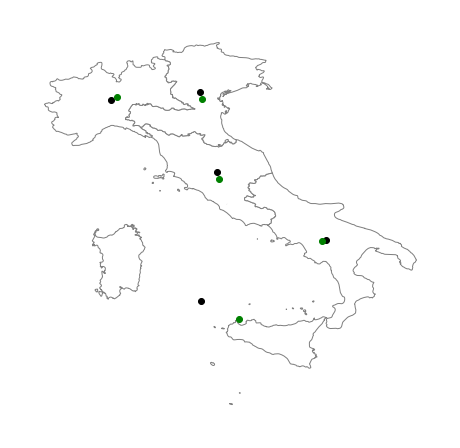

In [59]:
# green is population center while black is geo center
ax13 = macroregion_geo_centroids.plot(color='black', figsize=(8,8))
macroregion_pop_weighted_gdf.plot(figsize=(8,8), ax=ax13, color='green')
gplt.polyplot(macroregion_gemoetries, facecolor='white', edgecolor='grey', ax=ax13, figsize=(8,8))

## Cultural Regions

### Getting Cultural Geometries

In [61]:
cultural_region_geometries = provinces_gdf.dissolve(by='Cultural_region')

### Finding Geographic Centroids

In [62]:
cultural_region_centroids = provinces_gdf.dissolve(by='Cultural_region')
cultural_region_centroids['geometry'] = cultural_region_centroids['geometry'].centroid

### Getting Weighted Population Centroids

In [63]:
# finding sum of population for each region
cultural_region_pop_sum = provinces_gdf.groupby('Cultural_region').Population.sum()

In [64]:
# finding weighted lat and lon for each region
provinces_gdf['Weighted_cult_region_centroid_lat'] = [provinces_gdf['Pop_weighted_lat'][x] / \
                                                 cultural_region_pop_sum[provinces_gdf['Cultural_region'][x]] 
                                                for x in range(len(provinces_gdf))]
provinces_gdf['Weighted_cult_region_centroid_lon'] = [provinces_gdf['Pop_weighted_lon'][x] / \
                                                 cultural_region_pop_sum[provinces_gdf['Cultural_region'][x]] 
                                                for x in range(len(provinces_gdf))]

In [65]:
# sum up all of the weighted coords and recombine
cult_region_coord_sum = provinces_gdf.groupby('Cultural_region') \
                    ['Weighted_cult_region_centroid_lat','Weighted_cult_region_centroid_lon'].sum()
cult_region_coord_sum['Weighted_centroid_coords'] = list(zip(
                                                    cult_region_coord_sum['Weighted_cult_region_centroid_lat'], 
                                                   cult_region_coord_sum['Weighted_cult_region_centroid_lon']))
cult_region_coord_sum['geometry'] = [Point(x) for x in cult_region_coord_sum['Weighted_centroid_coords']]

In [66]:
# making it into a geodataframe
cult_region_pop_weighted_gdf = gpd.GeoDataFrame(cult_region_coord_sum)

### Plot

<AxesSubplot:>

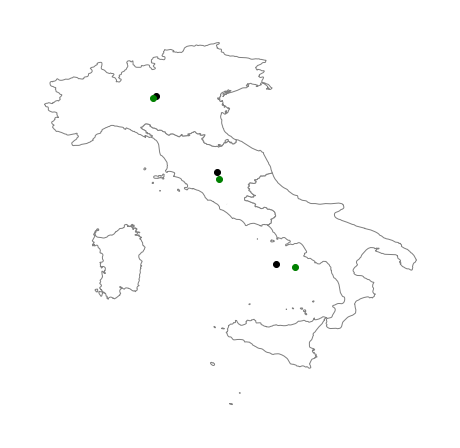

In [67]:
# green is population center while black is geo center
ax13 = cultural_region_centroids.plot(color='black', figsize=(8,8))
cult_region_pop_weighted_gdf.plot(figsize=(8,8), ax=ax13, color='green')
gplt.polyplot(cultural_region_geometries, facecolor='white', edgecolor='grey', ax=ax13, figsize=(8,8))

## All of Italy

### Getting Italy's Geometry

In [68]:
italy_geometry = provinces_gdf.dissolve(by='Country')

### Finding Geographic Centroids

In [85]:
italy_centroid = provinces_gdf.dissolve(by='Country')
italy_centroid['geometry'] = italy_centroid['geometry'].centroid

### Getting Weighted Population Centroids

In [76]:
# finding sum of population for each region
italy_pop_sum = provinces_gdf.groupby('Country').Population.sum()

In [79]:
# finding weighted lat and lon for each region
provinces_gdf['Weighted_country_centroid_lat'] = [provinces_gdf['Pop_weighted_lat'][x] / \
                                                 italy_pop_sum[provinces_gdf['Country'][x]] 
                                                for x in range(len(provinces_gdf))]
provinces_gdf['Weighted_country_centroid_lon'] = [provinces_gdf['Pop_weighted_lon'][x] / \
                                                 italy_pop_sum[provinces_gdf['Country'][x]] 
                                                for x in range(len(provinces_gdf))]

In [80]:
# sum up all of the weighted coords and recombine
country_coord_sum = provinces_gdf.groupby('Country') \
                    ['Weighted_country_centroid_lat','Weighted_country_centroid_lon'].sum()
country_coord_sum['Weighted_centroid_coords'] = list(zip(
                                                    country_coord_sum['Weighted_country_centroid_lat'], 
                                                   country_coord_sum['Weighted_country_centroid_lon']))
country_coord_sum['geometry'] = [Point(x) for x in country_coord_sum['Weighted_centroid_coords']]

In [81]:
# making it into a geodataframe
country_pop_weighted_gdf = gpd.GeoDataFrame(country_coord_sum)

In [83]:
country_pop_weighted_gdf

,Weighted_country_centroid_lat,Weighted_country_centroid_lon,Weighted_centroid_coords,geometry
Country,,,,
Italy,12.061933,42.939056,"(12.06193324270437, 42.939055815900794)",POINT (12.06193 42.93906)


### Plot

In [84]:
italy_centroid

,geometry,Code,name,Province,Region,Macroregion,Population,Area,Density,Cultural_region,Pop_weighted_lat,Pop_weighted_lon,Geographic_centroid,Weighted_region_centroid_lat,Weighted_region_centroid_lon,Weighted_macroregion_centroid_lat,Weighted_macroregion_centroid_lon,Weighted_cult_region_centroid_lat,Weighted_cult_region_centroid_lon
Country,,,,,,,,,,,,,,,,,,,
Italy,None,AG,Agrigento,Agrigento,Sicily,Insular,434870,3053,144,South,5.872772e+06,1.627845e+07,POINT (13.50466 37.43291),1.17458,3.255761,0.866149,2.400835,0.283185,0.784947


<AxesSubplot:>

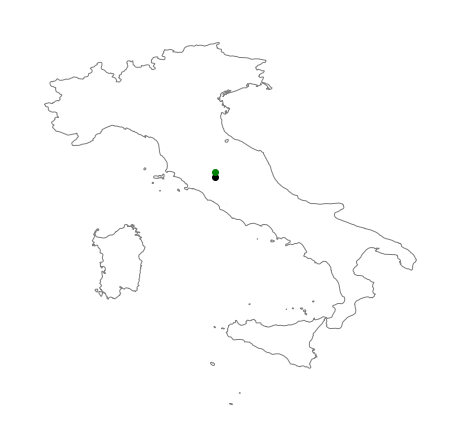

In [86]:
# green is population center while black is geo center
ax14 = italy_centroid.plot(color='black', figsize=(8,8))
country_pop_weighted_gdf.plot(figsize=(8,8), ax=ax14, color='green')
gplt.polyplot(italy_geometry, facecolor='white', edgecolor='grey', ax=ax14, figsize=(8,8))